In [ ]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_kindle_review .csv to preprocessed_kindle_review .csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
data=pd.read_csv('preprocessed_kindle_review .csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'rating', 'reviewText', 'summary'], dtype='object')

In [ ]:
data.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [ ]:
data.tail()

,Unnamed: 0,rating,reviewText,summary
11995,11995,2,Had to read certain passages twice--typos. Wi...,Where's the meat?
11996,11996,3,Not what i expected. yet a very interesting bo...,Interesting
11997,11997,5,Dragon Knights is a world where Knights ride d...,"Dragon Knights, Wings of Change (I Dream of Dr..."
11998,11998,4,"Since this story is very short, it's hard to s...","Good writing, short story"
11999,11999,4,from 1922 an amazing collection of info on sym...,interesting public domain book


In [ ]:
data.rating.value_counts()

5    3000
4    3000
1    2000
3    2000
2    2000
Name: rating, dtype: int64

In [ ]:
data=data.drop(columns=['summary','Unnamed: 0'])

In [ ]:
data

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."
...,...,...
11995,2,Had to read certain passages twice--typos. Wi...
11996,3,Not what i expected. yet a very interesting bo...
11997,5,Dragon Knights is a world where Knights ride d...
11998,4,"Since this story is very short, it's hard to s..."


In [ ]:
data.rating=data.rating.replace([1,2,3],0)
data.rating=data.rating.replace([4,5],1)

In [ ]:
data.isnull().sum()

rating        0
reviewText    0
dtype: int64

In [ ]:
data

,rating,reviewText
0,1,This book was the very first bookmobile book I...
1,0,"When I read the description for this book, I c..."
2,1,I just had to edit this review. This book is a...
3,1,I don't normally buy 'mystery' novels because ...
4,1,"This isn't the kind of book I normally read, a..."
...,...,...
11995,0,Had to read certain passages twice--typos. Wi...
11996,0,Not what i expected. yet a very interesting bo...
11997,1,Dragon Knights is a world where Knights ride d...
11998,1,"Since this story is very short, it's hard to s..."


In [ ]:
data.rating.value_counts()

1    6000
0    6000
Name: rating, dtype: int64

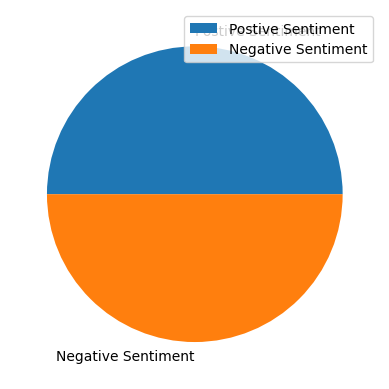

In [ ]:
y = np.array([6000,6000])
mylabels = ["Postive Sentiment", "Negative Sentiment"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

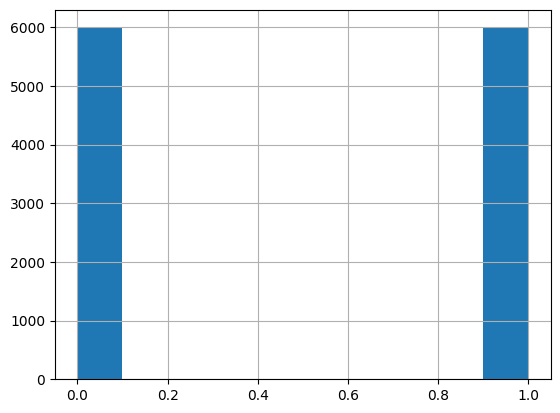

In [ ]:
data.rating.hist()
plt.show()

In [ ]:
my_data=data[:8000]

In [ ]:
my_data

,rating,reviewText
0,1,This book was the very first bookmobile book I...
1,0,"When I read the description for this book, I c..."
2,1,I just had to edit this review. This book is a...
3,1,I don't normally buy 'mystery' novels because ...
4,1,"This isn't the kind of book I normally read, a..."
...,...,...
7995,0,No summaries or spoilers. HIGH LEVEL: light pa...
7996,1,This is a great side story for Zsadist and Bel...
7997,1,Weekend Pick Me Up - Surviving The Fog by Stan...
7998,1,What a fun read! Phoebe is a much put upon gi...


In [ ]:
my_data.rating.value_counts()

0    4001
1    3999
Name: rating, dtype: int64

In [ ]:
sentiment_label = my_data.rating.factorize()
sentiment_label

(array([0, 1, 0, ..., 0, 0, 1]), Int64Index([1, 0], dtype='int64'))

In [ ]:
tweet = my_data.reviewText
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           873472    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 890,123
Trainable params: 890,123
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.25,epochs=10,batch_size=64)

Epoch 1/10
94/94 [==============================] - 39s 367ms/step - loss: 0.6479 - accuracy: 0.6192 - val_loss: 0.5161 - val_accuracy: 0.7620
Epoch 2/10
94/94 [==============================] - 35s 371ms/step - loss: 0.4512 - accuracy: 0.7960 - val_loss: 0.4276 - val_accuracy: 0.8110
Epoch 3/10
94/94 [==============================] - 33s 354ms/step - loss: 0.3578 - accuracy: 0.8477 - val_loss: 0.4089 - val_accuracy: 0.8210
Epoch 4/10
94/94 [==============================] - 32s 344ms/step - loss: 0.3015 - accuracy: 0.8830 - val_loss: 0.4041 - val_accuracy: 0.8310
Epoch 5/10
94/94 [==============================] - 35s 369ms/step - loss: 0.2501 - accuracy: 0.9043 - val_loss: 0.4652 - val_accuracy: 0.8055
Epoch 6/10
94/94 [==============================] - 35s 369ms/step - loss: 0.2133 - accuracy: 0.9202 - val_loss: 0.4592 - val_accuracy: 0.8135
Epoch 7/10
94/94 [==============================] - 33s 354ms/step - loss: 0.1790 - accuracy: 0.9338 - val_loss: 0.4645 - val_accuracy: 0.7955

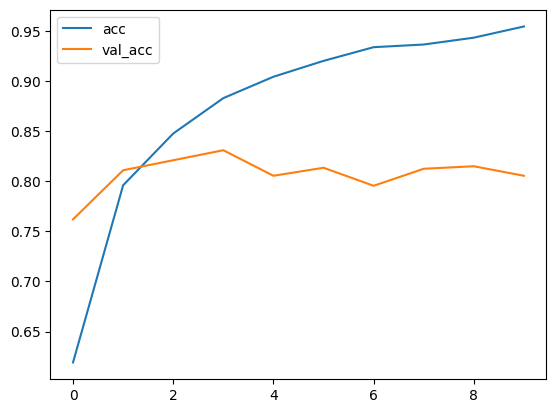

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

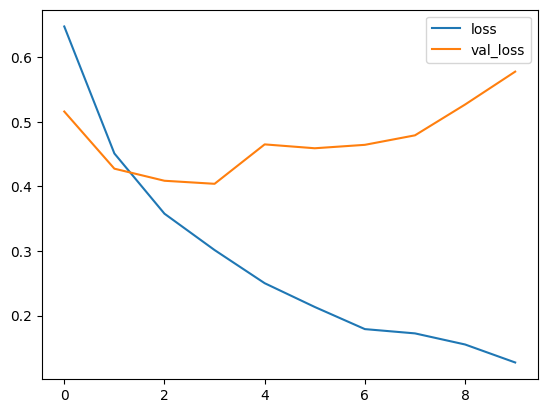

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

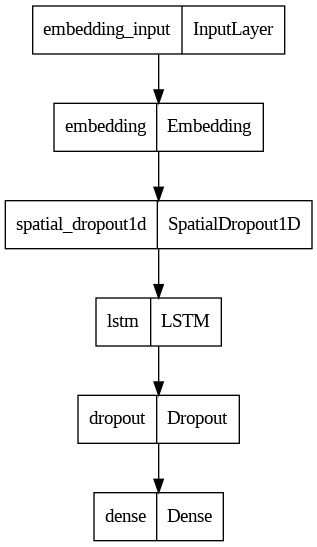

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    return sentiment_label[1][prediction]
    
test_sentence1 = "I like this book."
prediction = predict_sentiment(test_sentence1)

if prediction == 0:
    print("Postive Statement")
else:
    print("Negative Statement")

1/1 [==============================] - 0s 320ms/step
Negative Statement


In [ ]:
type(prediction)

numpy.int64